<a href="https://colab.research.google.com/github/sandipanpaul21/ML-Code-in-Python/blob/master/05_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Feature Engineering 

# It helps in increasing the accuracy of the model as by tweaking the features of the data
# the performance of the models can be improved which ultimately influences the final result.

# Normally Feature Engineering contains 3 Major Steps : 
# 1.Feature Transformation
# 2.Feature Scaling
# 3.Feature Construction

# 1. Feature Transformation
# Features are transformed by replacing the observations of the feature by a function
# Sometimes the datasets are not normally distributed and in such circumstances
# for the normal functioning of various statistical and other machine learning algorithms
# feature transformation is performed to normalize the data
# The common application of them is when dealing with predictive models 
# such as Linear Regression where we need to normalize the data if the data is otherwise.
# Methods Used: 1.Log Transformation 2.Square Root 3.Cube Root and 4.Box-Cox Transformation

# 2. Feature Scaling
# Feature scaling is conducted to standardize the independent features
# This is done because the range of raw data may vary widely. 
# Some predictive models such as KNN and K-means consider Euclidean distance 
# it is important for them to have the features on the same scale.
# Method Used: Min-Max Scaler 

# 3. Feature Construction
# It is a process of creating features based on the original descriptors
# This helps in building more efficient features for building predictive models
# Methods Used: 1.Binning and 2.Encoding

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib 
%matplotlib inline
from sklearn import datasets
import sklearn as sk
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler as min_max
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Load the Datasets (For indepth analysis please refer to Part O1 All About Datasets)

# Boston Dataset
boston = datasets.load_boston()
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
boston_pd["MEDV"] = boston.target
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Skewness

# Spreadness of the Distribution
# If Skewness = 0, data is perfectly symmetrical / Normally Distributed
# If Skewness is less than -1 or greater +1, distribution is highly skewed
# If Skewness is between -1 and -0.5 or between 0.5 and 1, distribution is moderately skewed
# If Skewness is between -0.5 and 0.5 then it is approximately symmetric  

boston_pd.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [5]:
# Check for one variable
print("Skewness of 'CRIM' Column is ",boston_pd['CRIM'].skew())

# Inference : 5.22 which is highly skewed. 

Skewness of 'CRIM' Column is  5.223148798243851


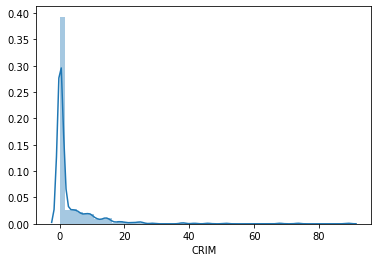

In [6]:
# Plot Bar Graph

# By Plotting histogram we can check the skewness of the data.
sns.distplot(boston_pd['CRIM'])

# Inference : 
# Right Skewed
# It is evident how skewed the data is. 
# We can now apply various transformation and see how it affects the skewness of the data.

After LOG TRANSFORMATION, Skewness is : 0.406




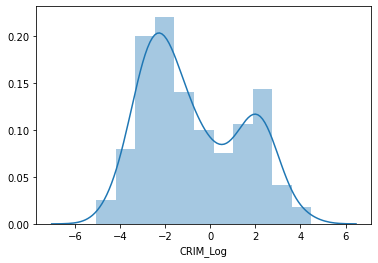

In [7]:
# Log Transformation

# Among the most commonly used methods of transformation, 
# Log Transformation takes the natural logarithm of the variable 
# which helps in making the distribution normal. 
# We do Log transformation on the variable, to reduce skewness and normalize the data

boston_pd['CRIM_Log'] = np.log(boston_pd['CRIM'])
print('After LOG TRANSFORMATION, Skewness is :',boston_pd['CRIM_Log'].skew().round(3))
print('\n')
sns.distplot(boston_pd['CRIM_Log'])

# Inference : 
# The distribution certainly now appears to be much more normal. 

After SQUARE ROOT TRANSFORMATION, Skewness is : 2.024




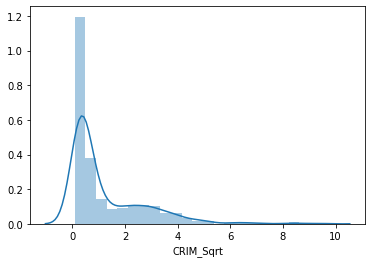

In [8]:
# Square-Root Transformation

# Another popular method of transformation is Square root transformation 
# which helps in normalizing the data.

boston_pd['CRIM_Sqrt'] = np.sqrt(boston_pd['CRIM'])
print('After SQUARE ROOT TRANSFORMATION, Skewness is :',boston_pd['CRIM_Sqrt'].skew().round(3))
print('\n')
sns.distplot(boston_pd['CRIM_Sqrt'])

# Inference : 
# The distribution certainly now appears to be much more normal.

After CUBE ROOT TRANSFORMATION, Skewness is : 1.363




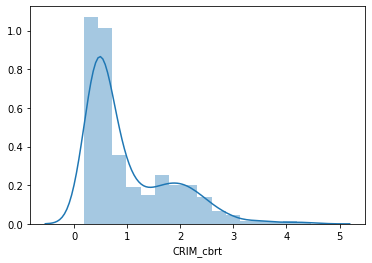

In [9]:
# Cube-Root Transformation
# Apart form Log and Square-Root transformation, Cube-Root transformation can also be tried.

boston_pd['CRIM_cbrt'] = np.cbrt(boston_pd['CRIM'])
print('After CUBE ROOT TRANSFORMATION, Skewness is :',boston_pd['CRIM_cbrt'].skew().round(3))
print('\n')
sns.distplot(boston_pd['CRIM_cbrt'])

# Inference : 
# The distribution certainly now appears to be much more normal.

After BoxCox Transformation, Skewness is  0.094




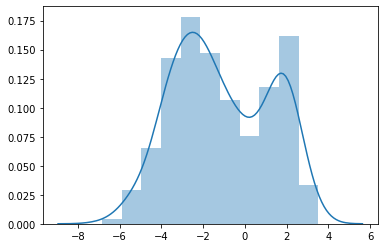

In [10]:
# Box Cox Transformation

CRIM_BoxCox = stats.boxcox(boston_pd['CRIM'])[0]
Variable = pd.Series(CRIM_BoxCox)

print("After BoxCox Transformation, Skewness is ",Variable.skew().round(3))
print('\n')
sns.distplot(Variable)

# Inference :
# So the best one is BoxCox Transformation because of LOWEST SKEWNESS out of all three

In [11]:
# All the Skewness Value Calculated
print("Comparing all Skewness values")
pd.DataFrame([boston_pd['CRIM'].skew(),boston_pd['CRIM_Log'].skew(),
              boston_pd['CRIM_Sqrt'].skew(),
              boston_pd['CRIM_cbrt'].skew(),Variable.skew()],
             index=['Normal','Log','Square Root','Cube Root','Box Cox'],
             columns = ["CRIM Skewness"])

# Inference : Best transformations can be Log or Box Cox Transformation

Comparing all Skewness values


,CRIM Skewness
Normal,5.223149
Log,0.405934
Square Root,2.024382
Cube Root,1.362514
Box Cox,0.093649


In [12]:
# Min Max Scaler

# MinMaxScaler method is one of the methods of standardizing 
# the data where values are made to lie between 0 and 1.

# Initialization
# We begin with initializing the min_max function.

scaled = min_max()
scaled

# Inference : Range is set from 0 to 1

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
# Fit min_max function

# After initialization, we fit the mix_max function on the numerical variable which we need to standardize.
scaled.fit(boston_pd)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
# Generating Output

# Once the function is fit, we can generate output which will have the standardized values 
boston_pd_scaled = scaled.transform(boston_pd)
boston_pd_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.53211022e-01, 9.16892109e-03, 2.71662926e-02],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.53134329e-01, 9.16245030e-03, 2.71491104e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        2.36925934e-01, 1.78544915e-02, 4.86617589e-02],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        2.98671060e-01, 2.68939834e-02, 6.86206232e-02],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        2.10953574e-01, 1.47799292e-02, 4.13702247e-02]])

In [15]:
# Binning

# This method is used to create bins for continuous variables 
# where continuous variables are converted to categorical variables.
# Two types Binning - 1. Automatic & Manual Binning

# For this Analysis we will only take 'AGE' Column in Boston Dataset
AgeData = boston_pd[['AGE']]
print(type(AgeData))
print(AgeData.dtypes)

<class 'pandas.core.frame.DataFrame'>
AGE    float64
dtype: object


In [16]:
# Automatic Binning

# Bins are created automatically 
# we do not explicitly mention how the bins are to be created

AgeData['Auto_BINS'] = pd.cut(AgeData['AGE'],4)
AgeData.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AGE,Auto_BINS
0,65.2,"(51.45, 75.725]"
1,78.9,"(75.725, 100.0]"
2,61.1,"(51.45, 75.725]"
3,45.8,"(27.175, 51.45]"
4,54.2,"(51.45, 75.725]"


In [17]:
# Manual Binning

# We specify in the code about where the bins are to be created.
AgeData['Manual_BINS']=pd.cut(AgeData['AGE'],bins=[0,50,60,70,80],
                              labels=["0-50","51-60","61-70","70+"])
AgeData.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,AGE,Auto_BINS,Manual_BINS
0,65.2,"(51.45, 75.725]",61-70
1,78.9,"(75.725, 100.0]",70+
2,61.1,"(51.45, 75.725]",61-70
3,45.8,"(27.175, 51.45]",0-50
4,54.2,"(51.45, 75.725]",51-60


In [18]:
# Encoding

# Encoding is a process of creating numerical variables from categorical variables
# This is done in order to make the categorical features available for analysis 
# as most of the learning algorithms require numerical features for their functioning.

# Creating Dataset
# We create an arbitrary dataset having Age and Gender of 10 individuals.
Encode1 = pd.DataFrame({'Gender':['M','F','F','M','M','M','F','M','F','F'],
                       'Age':['22','23','24','26','28','30','27','32','35','37']})
Encode1

,Gender,Age
0,M,22
1,F,23
2,F,24
3,M,26
4,M,28
5,M,30
6,F,27
7,M,32
8,F,35
9,F,37


In [19]:
# get_dummies: It is one of the available functions to perform Encoding.
 
# Performing Encoding
Encode1_Dummy = pd.get_dummies(Encode1,columns=['Gender'])
Encode1_Dummy

,Age,Gender_F,Gender_M
0,22,0,1
1,23,1,0
2,24,1,0
3,26,0,1
4,28,0,1
5,30,0,1
6,27,1,0
7,32,0,1
8,35,1,0
9,37,1,0


In [20]:
# Using drop_first

# Most of the times, if we have x number of categorical variables 
# then we want x-1 number of dummy variables. To do so we use the drop_first command.

Encode1_Dummy = pd.get_dummies(Encode1,columns=['Gender'],drop_first=True)
Encode1_Dummy

,Age,Gender_M
0,22,1
1,23,0
2,24,0
3,26,1
4,28,1
5,30,1
6,27,0
7,32,1
8,35,0
9,37,0


In [21]:
# One Hot Encoding

# It is another method of Encoding
onehot_encoder = OneHotEncoder(sparse=False)
print(onehot_encoder)
label_encoder = LabelEncoder()
print(label_encoder)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)
LabelEncoder()


In [22]:
# Labeling

# Here Label encoder is used to first label the the column ‘Gender’ i.e. the gender to 0s and 1s.
integer_encoded = label_encoder.fit_transform(Encode1['Gender'])
integer_encoded

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [23]:
# Performing One-Hot Encoding

# After the categorical variable has been labeled to 0s and 1s, 
# we will use one hot encoding to create dummy variable for ‘Gender’
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
onehot_encoded

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [24]:
# One_Hot Encoding on Dataset
# We now perform One_Hot encoding on the dataset 
# that we used above during the application of the get_Dummies function.
 
# Separate Categorical Variables and perform Labeling
# We first separate the categorical variables from the dataset and then label them.
Encode2 = Encode1[['Gender']]
int_lab = Encode2.apply(label_encoder.fit_transform)
int_lab.head()

,Gender
0,1
1,0
2,0
3,1
4,1


In [25]:
# Perform One-Hot Encoding on Dataset

# We now perform One-Hot Encoding on these categorical labelled variables.
Onhotencode = OneHotEncoder(sparse=False,dtype=int)
one_hot_encode_output = Onhotencode.fit_transform(int_lab)
one_hot_encode_output

array([[0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0]])

In [26]:
# Transforming the output into Dataframe

# For our convenience and ease, we transform the above output into a Dataframe.
one_hot_encode_output1 = pd.DataFrame(one_hot_encode_output,
                                      columns=['Gender_F','Gender_M'])
one_hot_encode_output1

,Gender_F,Gender_M
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
5,0,1
6,1,0
7,0,1
8,1,0
9,1,0
